#### Lifecycle of a Data Science Projects:
1)Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys.  
2)Feature Engineering---Handling Missing Values
  
#### Why are their Missing values?? Survey--Depression Survey
1)They hesitate to put down the information  
2)Survey informations are not that valid  
3)Men--salary  
4)Women---age  
5)People may have died----NAN  
6)Data Science Projects---Dataset should be collected from multiple sources  



#### What are the different types of Missing Data?
Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values,observed or missing, within the dataset. In other words, those missing data points are a random subset of the data.There is nothing systematic going on that makes some data more likely to be missing than other

Age and cabin has a relationship between them as we collet data after ship sink,more people may die.so comes under  
MNAR(Missing not at Random)  
EMbarked comes under MCAR

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("train.csv")

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [5]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [6]:
import seaborn as sns

<AxesSubplot:>

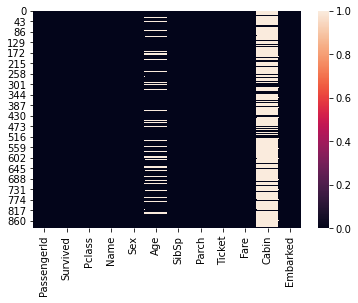

In [6]:
sns.heatmap(df.isnull())

<AxesSubplot:>

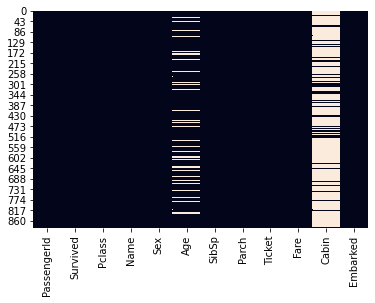

In [7]:
sns.heatmap(df.isnull(),cbar=False)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

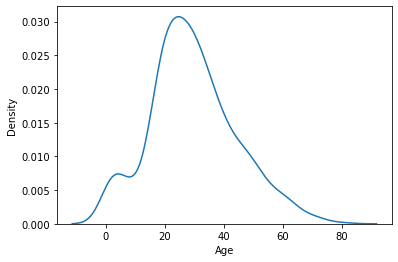

In [8]:
sns.distplot(df["Age"],hist=False)

<AxesSubplot:xlabel='Age'>

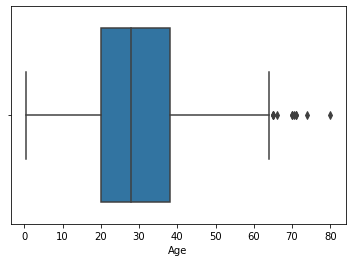

In [9]:
sns.boxplot(x="Age",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

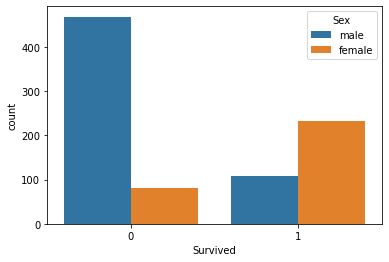

In [13]:
sns.countplot(x="Survived",hue="Sex",data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

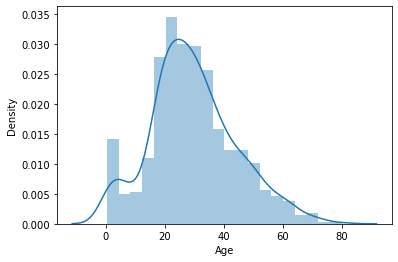

In [10]:
sns.distplot(df["Age"].dropna())

In [14]:
df["cabin_null"]=np.where(df["Cabin"].isnull(),1,0)

In [20]:
df["Survived"][df["cabin_null"]==1].mean()

0.29985443959243085

In [21]:
df["cabin_null"].mean()

0.7710437710437711

In [46]:
df[df["Survived"]==1]["cabin_null"].mean()

0.6023391812865497

In [50]:
df.groupby("Survived").mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,cabin_null
Survived,,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887,0.876138
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408,0.602339


#### missing at random
men hiding their salary  
women hiding their age

#### ALL TECHINIQUES OF HANDLING MISSING VALUES
####  All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

Mean/ MEdian /Mode imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [22]:
DF=pd.read_csv("train.csv",usecols=["Survived",'Age',"Fare"])

In [23]:
DF

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [59]:
DF.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [24]:
def impute_nan(DF,variable,median):
    DF[variable+"median"]=DF[variable].fillna(median)
    

In [25]:
median=DF["Age"].median()

In [26]:
impute_nan(DF,'Age',median)

In [27]:
DF

,Survived,Age,Fare,Agemedian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [29]:
DF.isnull().mean()

Survived     0.000000
Age          0.198653
Fare         0.000000
Agemedian    0.000000
dtype: float64

In [30]:
DF.std()

Survived      0.486592
Age          14.526497
Fare         49.693429
Agemedian    13.019697
dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Agemedian', ylabel='Density'>

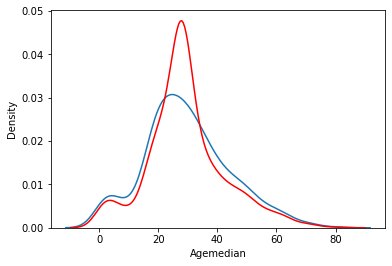

In [31]:
sns.distplot(DF['Age'],hist=False)
sns.distplot(DF['Agemedian'],hist=False,color="r")

Advantages And Disadvantages of Mean/Median Imputation  
Advantages  
Easy to implement(Robust to outliers)  
Faster way to obtain the complete dataset  
#### Disadvantages  
Change or Distortion in the original variance  
Impacts Correlation

In [32]:
DF

,Survived,Age,Fare,Agemedian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


#### day 2
#### Random sample imputation
Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [65]:
import numpy as np
import pandas as pd
df=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])

In [36]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [35]:
df["Age"].dropna().sample(10)
#gives 55 random samples(taken from age columns)with random index 
#to obtain consistent one use random_state=0

266    16.0
509    26.0
539    22.0
549     8.0
583    36.0
501    21.0
440    45.0
355    28.0
433    17.0
237     8.0
Name: Age, dtype: float64

In [134]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)
#taken samples of size== to size of nan values 


423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [135]:
def impute_nan(df,variable,median):
    df[variable+"median"]=df[variable].fillna(median)
    df[variable+"random"]=df[variable]
    #it will have a sample values to fill na values
    randomsample=df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)
    # randomsample index  needs to equals to indexs where variable feature has null value in merge to data set
    randomsample.index=df[df[variable].isnull()].index
    df.loc[df[df[variable].isnull()].index,variable+"random"]=randomsample

    
    

In [136]:
median=df["Age"].median()

In [137]:
impute_nan(df,"Age",median)

In [138]:
df

,Survived,Age,Fare,Agemedian,Agerandom
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

<AxesSubplot:xlabel='Agerandom', ylabel='Density'>

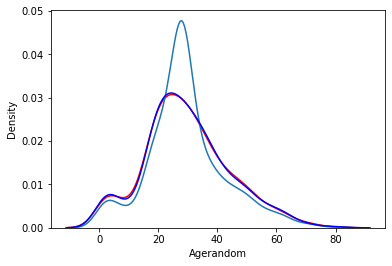

In [144]:
sns.distplot(df["Age"],hist=False,color="r")
sns.distplot(df["Agemedian"],hist=False)
sns.distplot(df["Agerandom"],hist=False,color="b")


Advantages  
Easy To implement  
There is less distortion in variance  
Disadvantage  
Every situation randomness wont work  

# capturing nan values with a new feature
It works well if the data are not missing completely at random



In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])

In [146]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [2]:
df["Age_Nan"]=np.where(df["Age"].isnull(),1,0)

In [150]:
df

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


Advantages  
Easy to implement   
Captures the importance of missing values  
Disadvantages  
Creating Additional Features(Curse of Dimensionality  

# End of distribution impuatation

In [68]:
import numpy as np
import pandas as pd
df=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])

In [69]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
import matplotlib.pyplot as plt

(array([14., 10.,  6., 10.,  4.,  3.,  3.,  4.,  8.,  2.,  4.,  1.,  2.,
         6.,  6., 17., 13., 26., 25., 15., 25., 27., 15., 31., 24., 18.,
        18., 25., 22., 25., 19., 18., 17., 15., 19., 22.,  7., 11., 14.,
        13.,  8., 13.,  5.,  9., 12.,  5.,  9.,  9.,  6., 10.,  7.,  6.,
         1.,  8.,  2.,  5.,  2.,  5.,  2.,  4.,  3.,  4.,  2.,  2.,  3.,
         1.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 0.42   ,  1.41475,  2.4095 ,  3.40425,  4.399  ,  5.39375,
         6.3885 ,  7.38325,  8.378  ,  9.37275, 10.3675 , 11.36225,
        12.357  , 13.35175, 14.3465 , 15.34125, 16.336  , 17.33075,
        18.3255 , 19.32025, 20.315  , 21.30975, 22.3045 , 23.29925,
        24.294  , 25.28875, 26.2835 , 27.27825, 28.273  , 29.26775,
        30.2625 , 31.25725, 32.252  , 33.24675, 34.2415 , 35.23625,
        36.231  , 37.22575, 38.2205 , 39.21525, 40.21   , 41.20475,
        42.1995 , 43.19425, 44.189  , 45.18375, 46.1785 , 47.17325

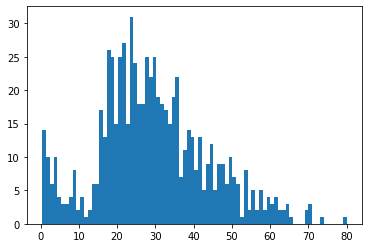

In [7]:
plt.hist("Age",data=df,bins=80)

<AxesSubplot:>

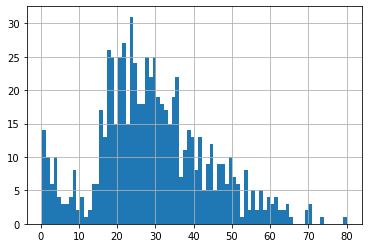

In [6]:
df.Age.hist(bins=80)

In [9]:
import seaborn as sns

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age'>

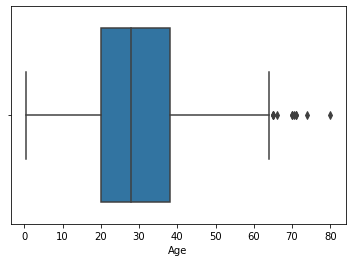

In [7]:
sns.boxplot(x="Age",data=df)


In [8]:
def impute_nan(DF,variable,median,extreme):
    DF[variable+"median"]=DF[variable].fillna(median)
    DF[variable+"extreme"]=DF[variable].fillna(extreme)

In [9]:
median=df.Age.median()
extreme=df.Age.mean()+3*(df.Age.std())
print(extreme,median)

73.27860964406095 28.0


In [10]:
impute_nan(df,"Age",median,extreme)

In [11]:
df

,Survived,Age,Fare,Agemedian,Ageextreme
0,0,22.0,7.2500,22.0,22.00000
1,1,38.0,71.2833,38.0,38.00000
2,1,26.0,7.9250,26.0,26.00000
3,1,35.0,53.1000,35.0,35.00000
4,0,35.0,8.0500,35.0,35.00000
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.00000
887,1,19.0,30.0000,19.0,19.00000
888,0,NaN,23.4500,28.0,73.27861
889,1,26.0,30.0000,26.0,26.00000


<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ageextreme', ylabel='Density'>

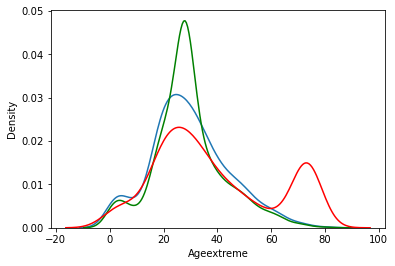

In [12]:
sns.distplot(df["Age"],hist=False)
sns.distplot(df["Agemedian"],hist=False,color="g")
sns.distplot(df["Ageextreme"],hist=False,color="r")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Ageextreme'>

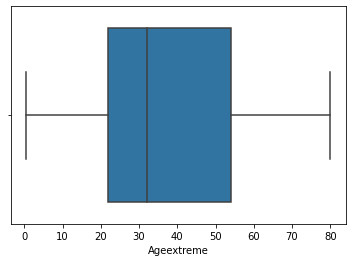

In [15]:
sns.boxplot(x="Ageextreme",data=df)


#### advantages

#### disavantages

#### ARBITARY SAMPLE IMPUTATION

In [19]:
df.head()

,Survived,Age,Fare,Agemedian,Ageextreme
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [20]:
def impute_arbitary(data,variable):
    data[variable+"arbitary"]=df[variable].fillna(0)
impute_arbitary(df,"Age")


In [21]:
df

,Survived,Age,Fare,Agemedian,Ageextreme,Agearbitary
0,0,22.0,7.2500,22.0,22.00000,22.0
1,1,38.0,71.2833,38.0,38.00000,38.0
2,1,26.0,7.9250,26.0,26.00000,26.0
3,1,35.0,53.1000,35.0,35.00000,35.0
4,0,35.0,8.0500,35.0,35.00000,35.0
...,...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.00000,27.0
887,1,19.0,30.0000,19.0,19.00000,19.0
888,0,NaN,23.4500,28.0,73.27861,0.0
889,1,26.0,30.0000,26.0,26.00000,26.0


#### Advantages  
Easy to implement  
Captures the importance of missingess if there is one  
#### Disadvantages  
Distorts the original distribution of the variable  
If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution  
Hard to decide which value to use